In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
import seaborn as sns


#### Import dataset from keras.dataset

In [3]:
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

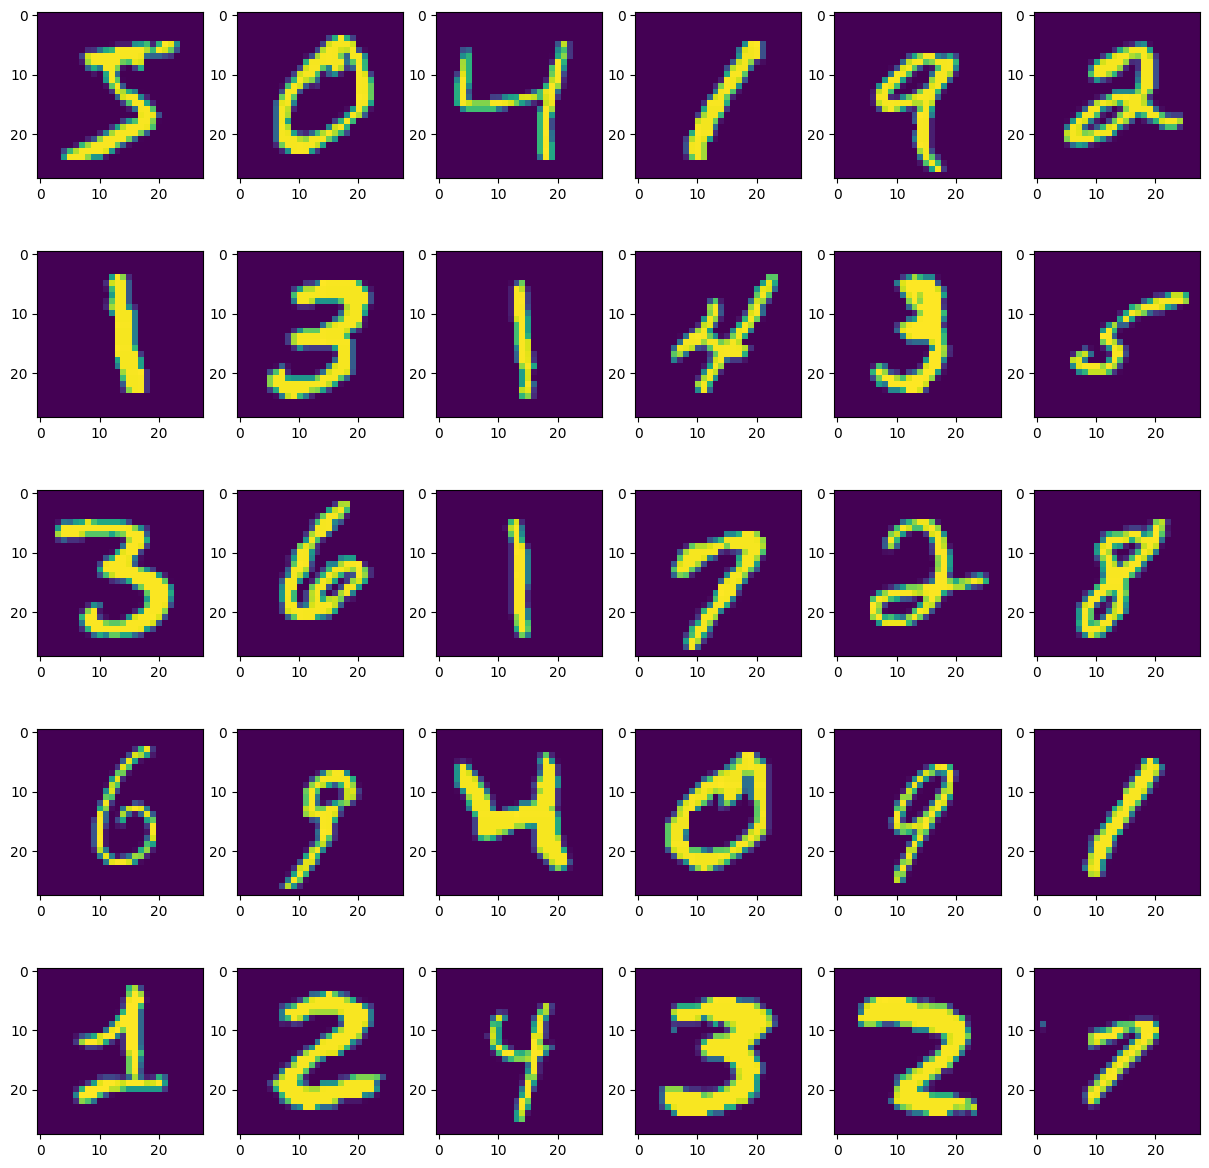

In [36]:
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(5,6,i+1)
    x= np.random.randint(0, xtrain.shape[0])
    plt.imshow(xtrain[i])

In [9]:
xtrain = xtrain/255
xtest = xtest/255

#### Build Model

In [11]:
 model = Sequential()

In [12]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam', metrics='accuracy')

In [15]:
model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10


2023-07-15 23:57:34.063101: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 8s 5ms/step - loss: 0.2884 - accuracy: 0.9196 - val_loss: 0.1514 - val_accuracy: 0.9590
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1248 - accuracy: 0.9642 - val_loss: 0.1165 - val_accuracy: 0.9649
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0857 - accuracy: 0.9747 - val_loss: 0.0993 - val_accuracy: 0.9709
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0644 - accuracy: 0.9800 - val_loss: 0.0922 - val_accuracy: 0.9738
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0821 - val_accuracy: 0.9752
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0957 - val_accuracy: 0.9727
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0862 - val_accuracy: 0.9763
Epo

In [40]:
y_prob = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [41]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [42]:
ytest[0]

7

In [43]:
ypred = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [44]:
ypred = ypred.argmax(axis=1)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,ypred)

0.9729

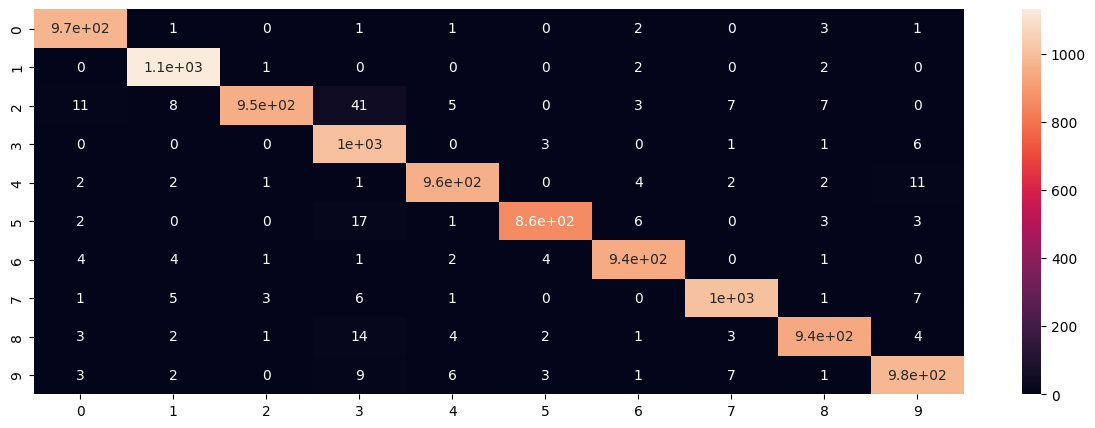

In [49]:
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.show()